# ISC entre de pacs de diferentes revimstas

In [3]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

def write_data_to_disk(file, data):
    with open(file, 'wb') as fid:
        pickle.dump(data, fid)


def load_data_from_disk(file):
    with open(file, 'rb') as fid:
        data = pickle.load(fid)
    return data

def intersection(l1, l2):
    l3 = [value for value in l1 if value in l2]
    return l3

def merge_dict(m50xy, m50yx):
    mais = {1: m50xy, 2:m50yx}

    L = {}
    for i, valy in mais.items():
        if len(valy) != 0:
            for j, valx in valy.items():
                L[j] = valx
    return L

In [3]:
def ISC(r, t):
    if_r = r
    if_t = t
    alpha = 0.94
    beta = 2.37
    q = 0.33

    f0 = 1 / (1 + (q * (if_r ** alpha))) ** beta
    x = if_t / if_r

    q1 = 1 / (1 - f0)
    k = 1.23
    s = (f0 / 2) + ((1 - (f0 / 2)) / (1 + (q1 * (x ** (-k)))))
    S = round(s * 100, 2)
    return S

### Calculo ISC de xy yx para um ANO

In [4]:
def isc_xy_year(pacs_X_dict, pacs_Y_dict): 
    
    M_xy = {}
    for pac_r, fi_r in pacs_Y_dict.items(): # pacr -> Y 
        r = fi_r
        m = {}
        for pac_t, fi_t in pacs_X_dict.items(): # pact -> X
            t = fi_t
            indice = ISC(r,t)
            m[pac_t] = indice
        M_xy[pac_r] = m   # matriz em dict
    dmxy = pd.DataFrame.from_dict(M_xy)  
    # print(dmxy)  # imprime a matriz de isc do formato dataframe
    return M_xy

def isc_yx_year(pacs_X_dict, pacs_Y_dict):
    
    M_yx = {}
    for pac_r, fi_r in pacs_X_dict.items(): 
        r = fi_r
        m = {}
        for pac_t, fi_t in pacs_Y_dict.items():
            t = fi_t
            indice = ISC(r,t)
            m[pac_t] = indice
        M_yx[pac_r] = m   # matriz em dict
    dmyx = pd.DataFrame.from_dict(M_yx)  
    # print(dmyx)  # imprime a matriz de isc do formato dataframe
    return M_yx

def isc_pacs_betweenn_year(pacs_X_dict, pacs_Y_dict):
    ''' Recebe un dict de pacs com fi  {pac1: fi1, pac2: fi2, ...}
        Gera dois dict X vs Y e Y vs X '''
    
    M_xy = isc_xy_year(pacs_X_dict, pacs_Y_dict)  #(refY, objX): isc
    M_yx = isc_yx_year(pacs_X_dict, pacs_Y_dict)  #(refX, objY): isc
    
    return M_xy, M_yx


## Filtros pacs > 50

**m>50 v2** dict  
> ${(pr, pt): isc, ...}$


**m>50 values** list
>$[isc1, iscc2, isc3, ...]$


In [28]:
def isc_m50_pacs_v2(M_dict_isc):
    ''' Recebe um dict (matriz de isc's)
    {pr_1: {pt_1: isc_11, pt_2: isc_12}, pr_2: {pt_1: isc_21, pt_2: isc_22}}
    
    Gera um dict com isc's maiores que 50% no mesmo formato de [M_dict_isc]
    {(pr_1, pt_2): isc_12, (pr_2, pt_1): isc_21},
     onde isc_12 e isc_21 > 50% '''
    
    K = {}
    for pr, values in M_dict_isc.items():
        for po in values:
            if values[po] > 50:
                K[pr, po] = values[po]
    return K

def isc_m50_pacs_values(M_dict_isc):
    Kv = []
    for pr, values in M_dict_isc.items():
        for po in values:
            if values[po] > 50:
                Kv.append(values[po])
    return Kv


def isc_m50_pacs_v2_two(M_xy, M_yx): #Mxy-X obj, Myx-Y ref

    kxy = isc_m50_pacs_v2(M_xy)
    kyx = isc_m50_pacs_v2(M_yx)
    
    return kxy, kyx

def isc_m50_pacs_values_two(M_xy, M_yx):
    kxy = isc_m50_pacs_values(M_xy)
    kyx = isc_m50_pacs_values(M_yx)
    
    Kxy_yx = kxy + kyx
    
    return Kxy_yx

    
    
    

### Medidas Max

In [32]:
def max_isc_year_for_v2_two(Kx_dict, Ky_dict):
    ''' Recebe um dict do tipo {(pr, po): isc1_m50, (pr, po): isc2_m50} da func isc_m50_pacs_v2
    escolhe o máximo isc '''
    K_dict = merge_dict(Kx_dict, Ky_dict)
    po_m = max(K_dict, key=K_dict.get)
    isc_m = K_dict[po_m] # max de cada pac_r  
    # Max_p = {po_m: isc_m}

    return isc_m # Max_p


## Dict de FI de pacs

In [46]:
def main(revistax, revistay):

    pacs_X_dict = load_data_from_disk('Dict_fi_pacs50art_years_revistas/' + revistax + '_dic_fi_pacs50art_years.pk')
    pacs_Y_dict = load_data_from_disk('Dict_fi_pacs50art_years_revistas/' + revistay + '_dic_fi_pacs50art_years.pk')

    ano_x = list(pacs_X_dict.keys())
    ano_y = list(pacs_Y_dict.keys())

    anos = intersection(ano_x, ano_y)

    K_values = {}
    K_max = {}
    for ano in anos:
        # print('\n', ano)
        px = pacs_X_dict[ano]
        py = pacs_Y_dict[ano]

        mxy, myx = isc_pacs_betweenn_year(px, py)
        m50xy, m50yx = isc_m50_pacs_v2_two(mxy, myx)
        
        m50xyyx_val = isc_m50_pacs_values_two(mxy, myx)
        print()

        p_max= max_isc_year_for_v2_two(m50xy, m50yx)

        K_values[ano] = m50xyyx_val 
        K_max[ano] = p_max
        
    return K_values, K_max 
    
# revistax = 'PRL'
# revistay = 'PRD'

# main(revistax, revistay)


In [6]:
def convert(rev_isc):
    g = {}
    for key, values in rev_isc.items():
        j = {}
        for k, val in values.items():
            j[int(k)] = val
        g[key]= j

    #print(g)
    return g

In [52]:
def boxplot_between(revistax, revistay):
    dict_data, dict_max = main(revistax, revistay)
    pma = pd.DataFrame.from_dict(dict_max, orient='index', columns=['max'])
    
    labels, data = [*zip(*dict_data.items())]
    
    rev_isc = load_data_from_disk('XvsY_isc_revistas/' + revistax + 'vs' + revistay + '_isc_years.pk')
    dit = convert(rev_isc)
    d_rev = pd.DataFrame(dit)
    dr = d_rev[50 < d_rev]
    
    pcc = pd.concat([pma, dr], axis=1, sort=True)

    pcc.plot(ls='-', marker='o', color=['blue', 'red','dimgrey' ,'slategray', 'cornflowerblue', 'lightcoral', 'slategray', 'cadetblue', 'burlywood'])
    medianp= dict(linewidth=1, color='black')
    bplot = plt.boxplot(data,positions=labels, showfliers=False, medianprops=medianp)

    for i, v in dict_data.items():
        di = sorted(v, reverse=True)
        y = di[0:5]
        x = [i, i, i, i, i] 
        plt.scatter(x, y, s=10, marker='o', facecolors='none', edgecolors='k')

    plt.title('{} vs {}'.format(revistax, revistay))
    plt.xlim(1985, 2016)
    plt.xticks(rotation='vertical', fontsize=9)
    plt.xlabel('Anos')
    plt.ylabel('Índice de sucesso de citação (%)')
    #plt.savefig('prb_f.png', dpi=300)
    plt.show()    
                                                                         

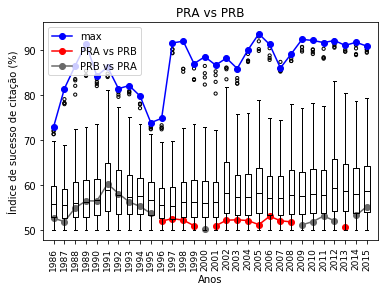

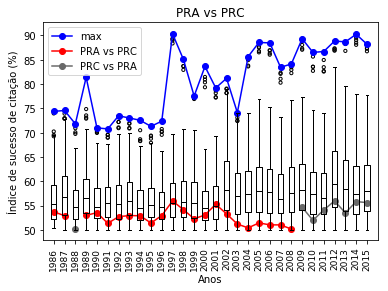

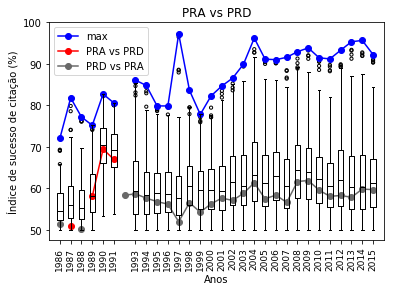

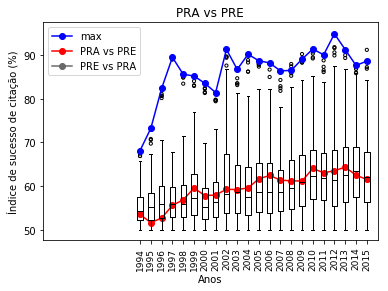

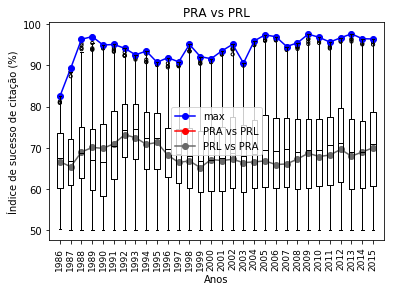

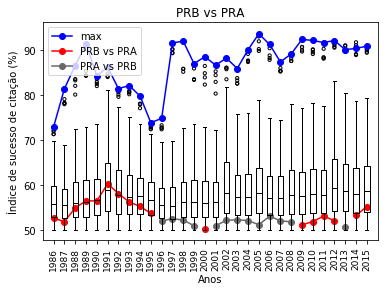

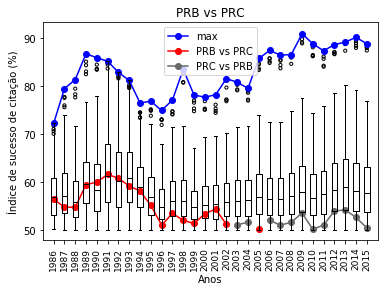

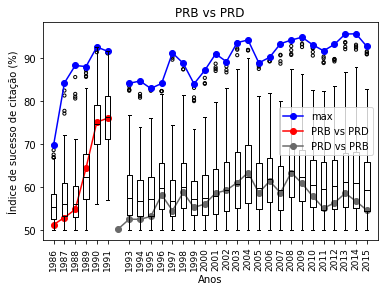

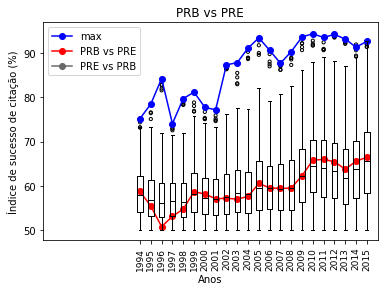

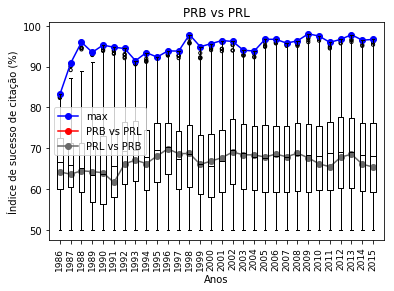

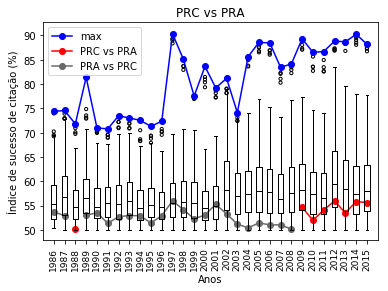

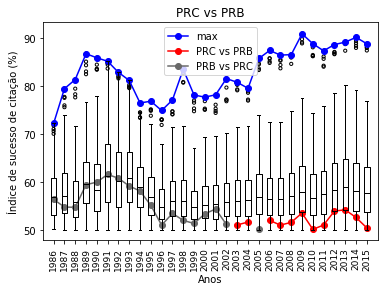

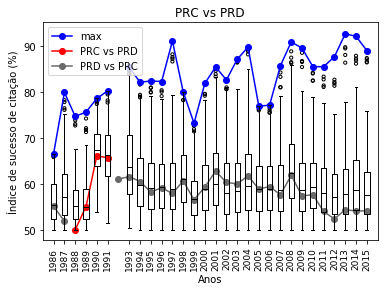

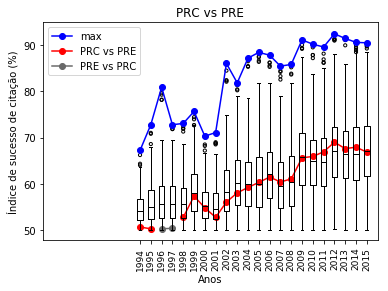

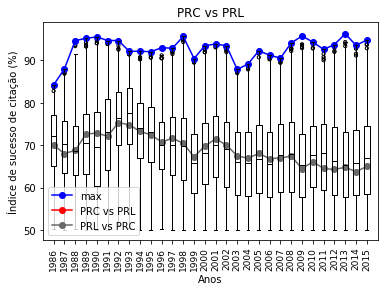

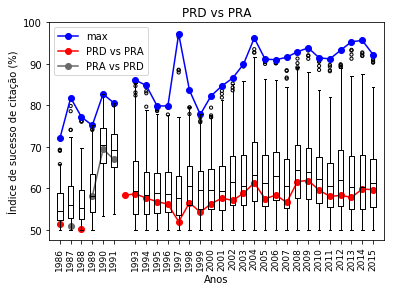

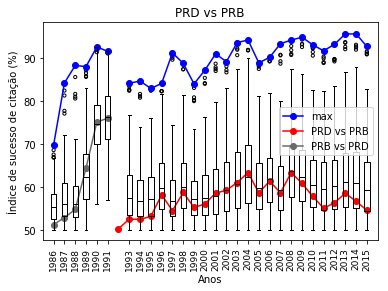

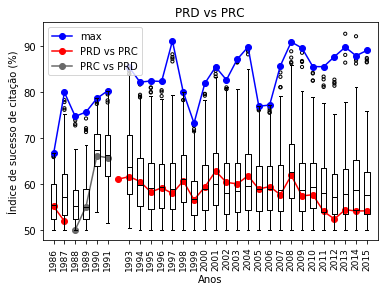

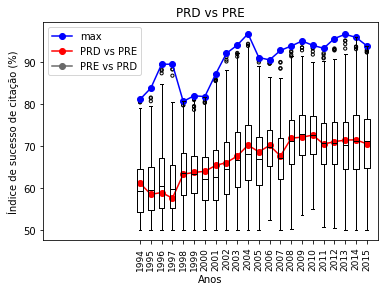

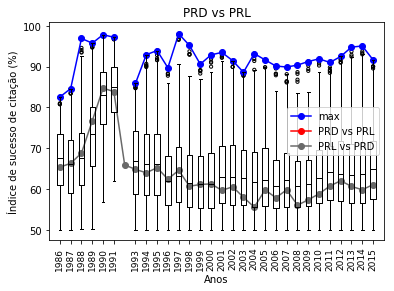

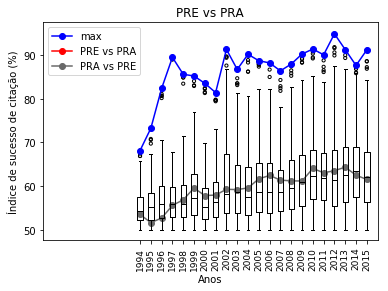

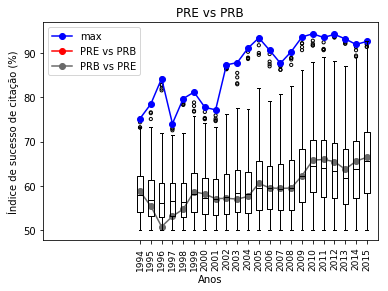

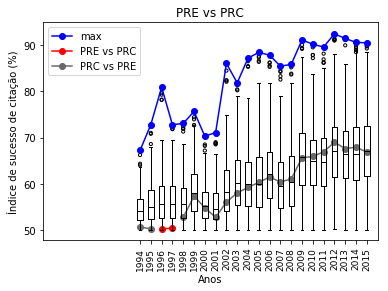

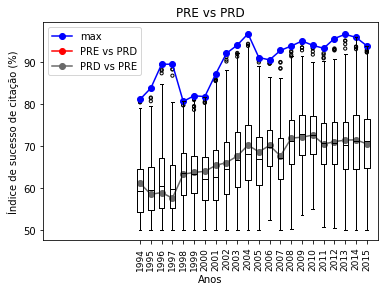

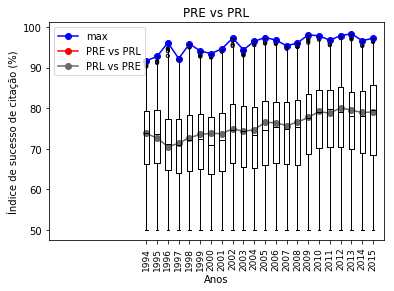

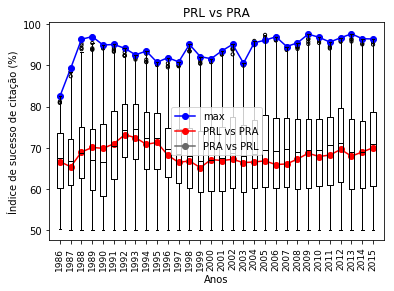

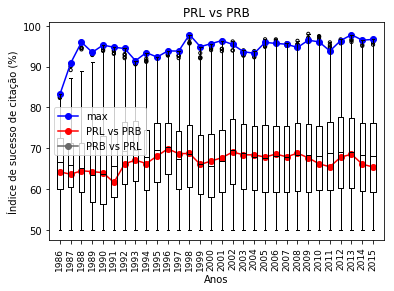

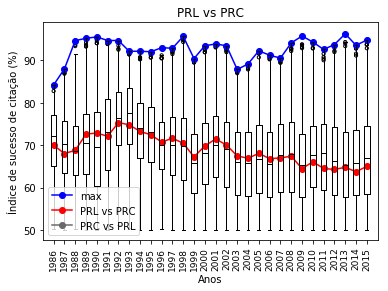

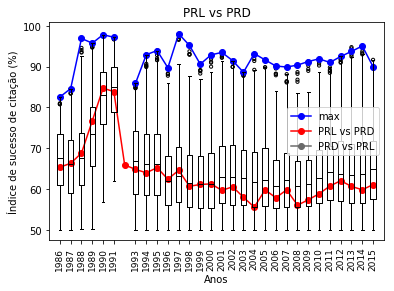

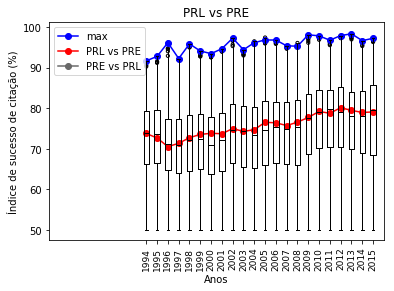

In [53]:
revistas = ['PRA', 'PRB', 'PRC', 'PRD', 'PRE', 'PRL']

for revistax in revistas:
    for revistay in revistas:
        if revistax != revistay:
            boxplot_between(revistax, revistay)
                




In [105]:
def isc_between_m50(revistax, revistay):
    rev_isc = load_data_from_disk('XvsY_isc_revistas/' + revistax + 'vs' + revistay + '_isc_years.pk')
    dit = convert(rev_isc)
    d_rev = pd.DataFrame(dit)
    dr = d_rev[50 < d_rev]
    dr_n = dr.dropna(how='all')
    
    labels = list(dr_n.index)
    liminf = min(labels)

    
    dr_n.plot(ls='-', marker='o', color=['crimson', 'indigo'])
    plt.xticks(labels, rotation='vertical')
    
    plt.title('{} vs {}'.format(revistax, revistay))
    plt.xlim(liminf - 1, 2016)
    #plt.xticks(rotation='vertical', fontsize=9)
    plt.xlabel('Anos')
    plt.ylabel('Índice de sucesso de citação (%)')
    plt.savefig(revistax + '_' + revistay + '_isc_rev.png', dpi=300)
    plt.show()    


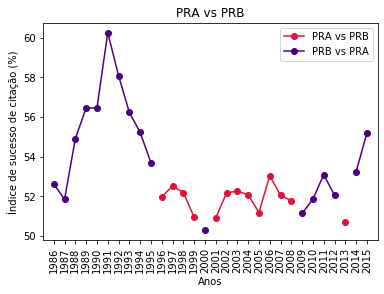

In [106]:
isc_between_m50('PRA', 'PRB')

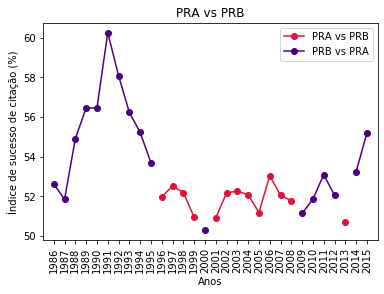

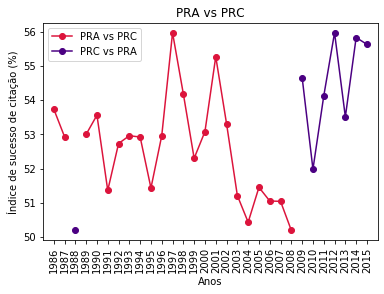

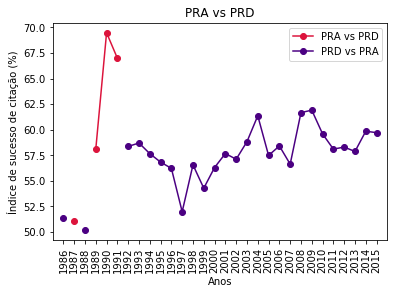

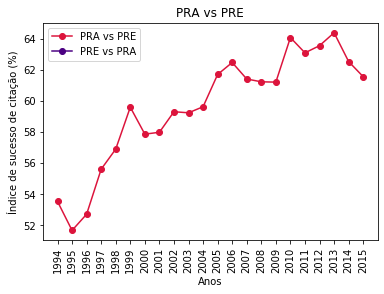

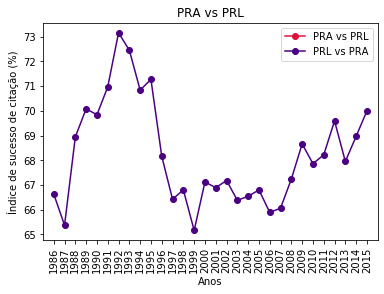

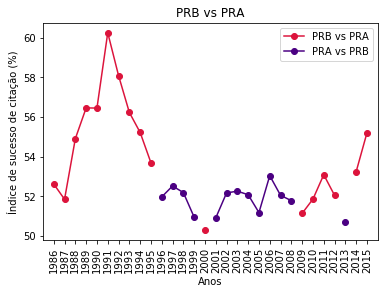

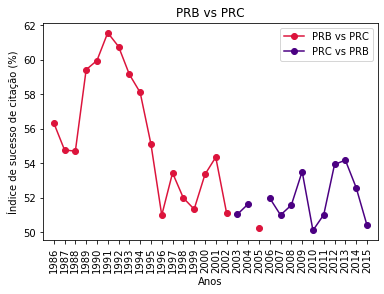

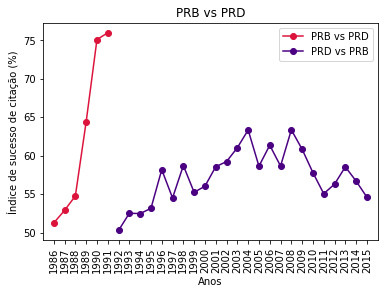

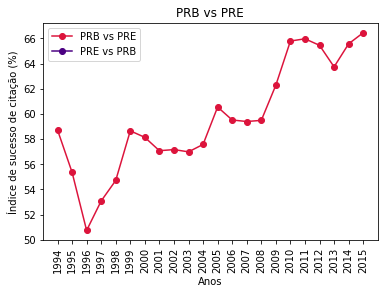

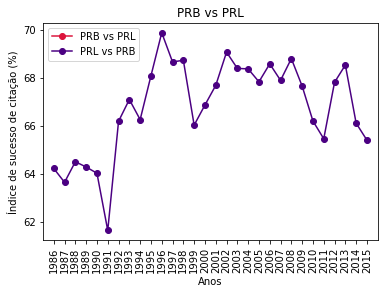

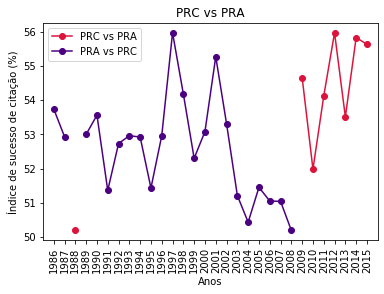

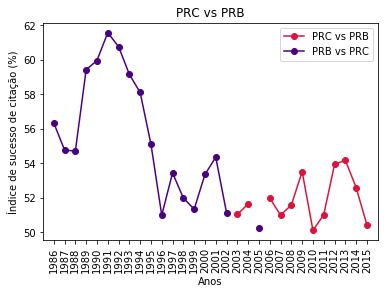

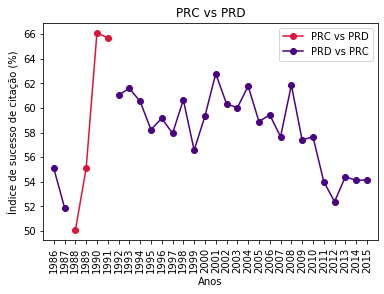

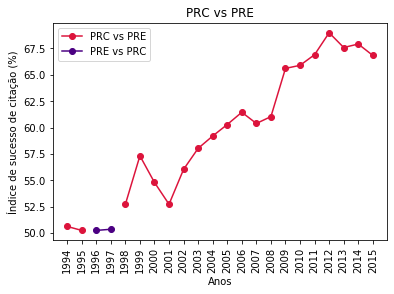

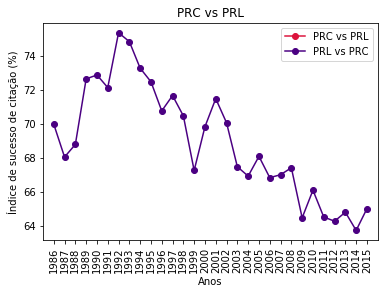

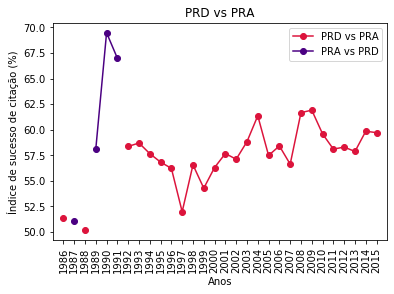

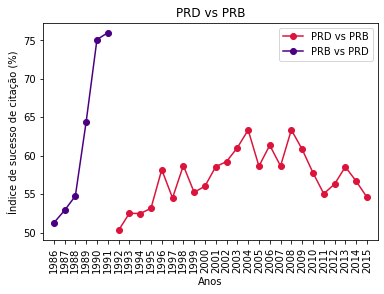

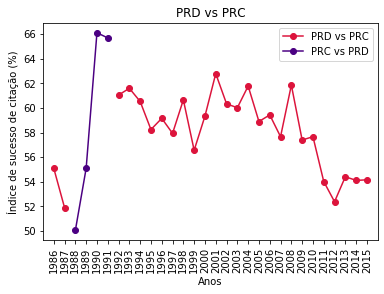

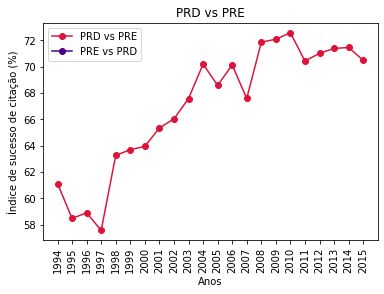

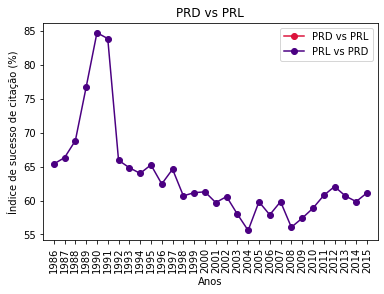

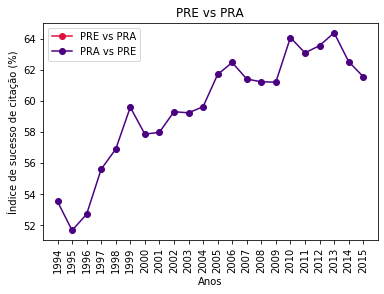

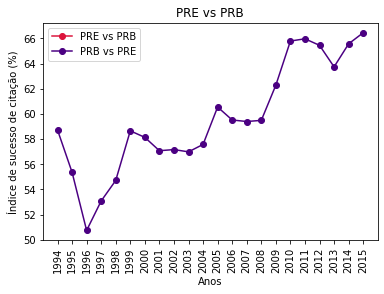

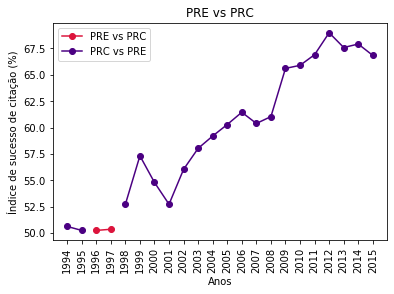

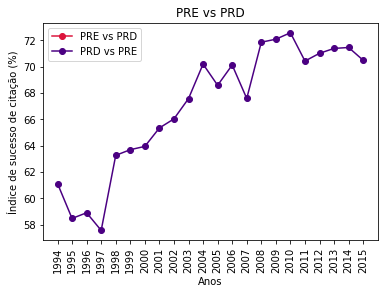

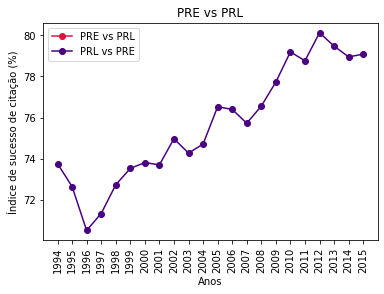

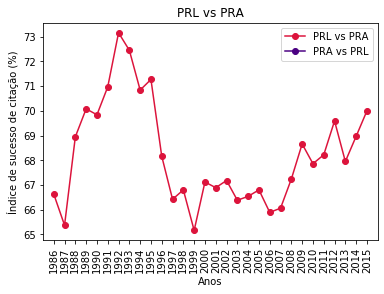

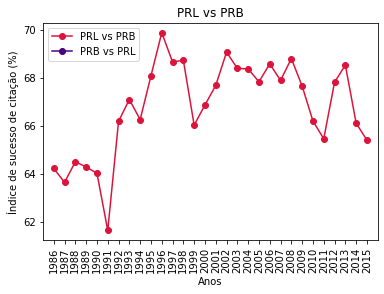

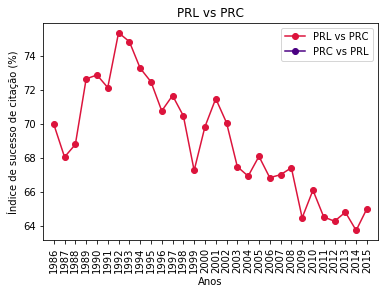

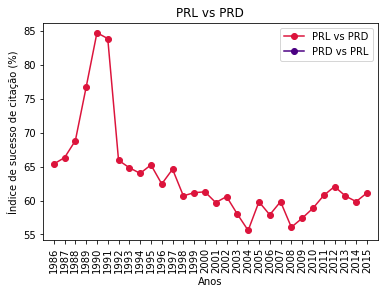

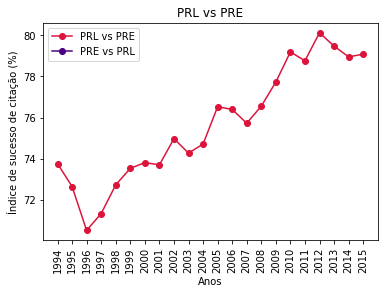

In [107]:
revistas = ['PRA', 'PRB', 'PRC', 'PRD', 'PRE', 'PRL']

for revistax in revistas:
    for revistay in revistas:
        if revistax != revistay:
            isc_between_m50(revistax, revistay)